## MVA 2021-22  -  TP2

To download this notebook or its html/pdf version:

http://geometrica.saclay.inria.fr/team/Fred.Chazal/MVA2021.html

In [1]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

# "Exercise 0": ToMaTo Clustering

This first part is not an exercise, just an illustration of the persistence-based clustering algorithm ToMaTo!

Gudhi provides an implementation of the persistence-based clustering algorithm ToMaTo.

See here for the documentation:

http://gudhi.gforge.inria.fr/python/latest/clustering.html

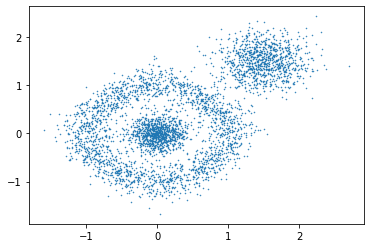

In [2]:
nb_pts=1000
angles = np.random.rand(2*nb_pts,1)
noisy_circle =\
    (1+ 0.2*np.random.normal(size=(2*nb_pts,2))) * np.concatenate([np.cos(2*np.pi*angles),np.sin(2*np.pi*angles)],axis=1)

gauss1 = 0.2 * np.random.normal(size=(nb_pts,2))
gauss2 = [1.5,1.5] + 0.3 * np.random.normal(size=(nb_pts,2))
data = np.concatenate([noisy_circle, gauss1, gauss2], axis=0)
plt.scatter(data[:,0],data[:,1],marker='.',s=1)
plt.show()

c:\users\kayar\appdata\local\programs\python\python39\lib\site-packages\gudhi\clustering\tomato.py:285: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


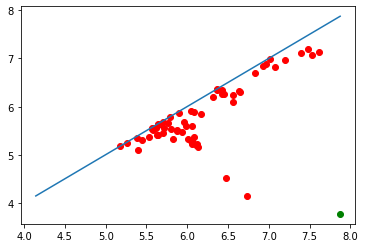

In [3]:
from gudhi.clustering.tomato import Tomato
t = Tomato(k=20)
t.fit(data)
t.plot_diagram()

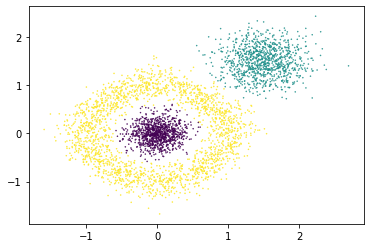

In [4]:
t.n_clusters_=3
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.labels_)
plt.show()

c:\users\kayar\appdata\local\programs\python\python39\lib\site-packages\gudhi\clustering\tomato.py:285: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


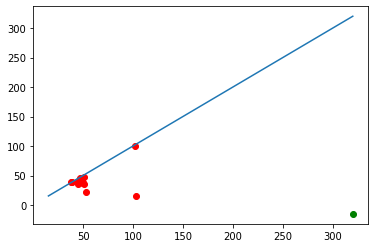

In [5]:
t = Tomato(density_type='DTM', k=30, k_DTM=100)
t.fit(data)
t.plot_diagram()

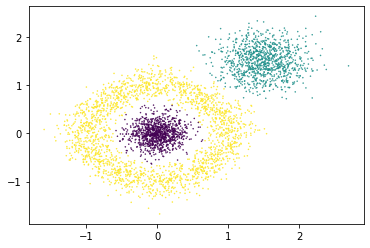

In [6]:
t.n_clusters_= 3
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.labels_)
plt.show()

# Exercise 1: Stability of persistence for functions

Documentation for the latest version of Gudhi: 

http://gudhi.gforge.inria.fr/python/latest/

The goal of this exercise is to illustrate the persistence stability theorem for functions on a very simple example. The code below allows to define a simplicial complex (the so-called α-complex) triangulating a set of random points in the unit square in the plane. Although we are not using it for this course, note that Gudhi also provides the grid-like CubicalComplex, which may be a more natural choice to represent a function on a square.

In [7]:
n_pts=1000
# Build a random set of points in the unit square
X = np.random.rand(n_pts, 2)
# Compute the alpha-complex filtration
alpha_complex = gd.AlphaComplex(points=X)
st = alpha_complex.create_simplex_tree()

Let $p_0=(0.25, 0.25), p_1=(0.75, 0.75), p_2 = (0.0, 1.0)$ and $p_3 = (1.0, 0.0)$ be 4 points in the plane $\mathbb{R}^2$ and $\sigma=0.05$.
1. Build on such a complex the sublevelset filtration of the function 
$$f(p)=\exp(-\frac{\|p-p_0\|^2}{\sigma})+3\exp(-\frac{\|p-p_1\|^2}{\sigma}) - \exp(-\frac{\|p-p_2\|^2}{\sigma}) 
- 2 \exp(-\frac{\|p-p_3\|^2}{\sigma})$$ 
and compute its persistence diagrams in dimensions 0 and 1.
2. Compute the persistence diagrams of random perturbations of f and compute the Bottleneck distance between these persistence diagrams and the perturbated ones. Verify that the persistence stability theorem for functions is satisfied.

In [53]:
min(simplex[1] for simplex in st.get_filtration())

0.0

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

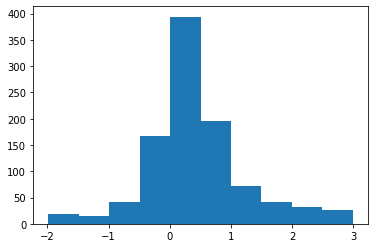

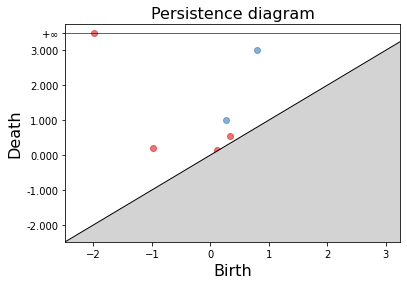

In [57]:
from math import *

f = np.zeros(X.shape[0]).reshape(-1,1)

p0 = np.array([0.25,0.25])
p1 = np.array([0.75,0.75])
p2 = np.array([0.0,1.0])
p3 = np.array([1.0,0.0])

sigma = 0.05

for point in range(X.shape[0]):
    
    f[point] = exp(- np.linalg.norm( X[point]- p0 , ord = 2)**2 / sigma) \
    + 3*exp(- np.linalg.norm( X[point]- p1 , ord = 2)**2 / sigma) \
    - exp(- np.linalg.norm( X[point]- p2 , ord = 2)**2 / sigma) \
    - 2*exp(- np.linalg.norm( X[point]- p3 , ord = 2)**2 / sigma) 

for simplex in st.get_filtration(): 
    idx = simplex[0]
    st.assign_filtration(idx, np.max(f[idx]))
    
persistence = st.persistence() # with no argument max dim = 1 so that it includes dim 0 and dim 1 only

gd.plot_persistence_diagram(persistence)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

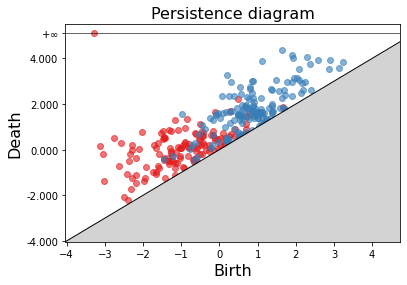

In [66]:
noise = np.random.uniform(-0.01,0.01,X.shape[0]).reshape(-1,1)

f += noise

for simplex in st.get_filtration(): 
    idx = simplex[0]
    st.assign_filtration(idx, np.max(f[idx]))
    
persistence = st.persistence() # with no argument max dim = 1 so that it includes dim 0 and dim 1 only

gd.plot_persistence_diagram(persistence)

# Exercise 2: Stability of Vietoris-Rips and alpha-complex filtrations

1. Illustrate the stability theorem for persistence diagrams of Vietoris-Rips and α-complex filtrations (take care that AlphaComplex uses the square of distances as filtration values).
2. What happens to Vietoris-Rips and α-complex filtrations when the size of the point cloud increases? When the ambient dimension increases?

# Linearization of persistence diagrams

# Exercise 3: Betti curves

We consider the map that associates to each persistence diagram $D$ a real valued function 
$\beta_D : \mathbb{R} \to \mathbb{R}$ in the following way:

$$\beta_D(x) = \# \{ p=(b,d) \in D : b \leq x \leq d \}.$$ 

1. Given a filtration $(K_r)_{r \in \mathbb{R}}$ of a $k$-dimensional simplicial complex $K$ and its persistence diagrams $D_0, D_1, \cdots, D_k$ in dimensions $0, 1, \cdots, k$ respectively, what does $\beta_{D_i}(x)$ represent? 
2. Write a function taking a persistence diagram (for a given homology dimension) as input that outputs its Betti curve (on a discretized grid). 
3. Compute the Betti curves of the random persistence diagrams obtained in the previous exercises. What can you say about the stability (as a function) of the Betti curves? Do they satisfy the same stability properties as the persistence diagrams? 

# Exercise 4: Persistence landscapes

1. Implement a function that compute the persistence landscapes of a persistence diagram (on a discretized grid): 

In [5]:
def landscapes_approx(diag,p_dim,x_min,x_max,nb_nodes,nb_ld):
    """Compute a dicretization of the first nb_ld landscape of a 
    p_dim-dimensional persistence diagram on a regular grid on the 
    interval [x_min,x_max]. The output is a nb_ld x nb_nodes numpy
    array
    + diag: a persistence diagram (in the Gudhi format)
    + p_dim: the dimension in homology to consider
    + x_min, x_max: the bounds of the interval on which the landscape is computed
    + nb_nodes: number of regularly spaced nodes on the interval (x_min,x_max) where the landscapes are evaluated
    + nb_ld: number of condidered landscapes
    """
    landscape = np.zeros((nb_ld,nb_nodes))
    ###
    ###  To do! 
    ###
    return landscapes

2 .Same question as Question 3 in Exercise 3. 